## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import warnings
warnings.simplefilter('ignore',FutureWarning)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
#%matplotlib nbagg
#%matplotlib widget

## Web scraping the wikipedia page for list of urban areas in Finland by population

In [3]:
html = requests.get('https://en.wikipedia.org/wiki/List_of_urban_areas_in_Finland_by_population')

In [4]:
#request successful
print(html)

<Response [200]>


In [5]:
# creating a instance of beautiful soup
soup = BeautifulSoup(html.text,'html.parser')

In [6]:
#print(soup.prettify())

## Creating dataframe from the urban cities table

In [7]:
# selecting all the available tables from the web page
urban_cities_finland=soup.select('table', class_= 'wikitable sortable')

In [8]:
# number of tables available
len(urban_cities_finland)

8

In [9]:
# We are interested in the first table which is the list of urban cities in finland
urban_table = urban_cities_finland[0]

In [10]:
#extracting the headers of the table as columns of the data frame
headers = urban_table.find_all('th')
columnnames = [h.get_text().replace('\n','') for h in headers]

In [11]:
# Creating an empty dataframe with the columns extracted from the table headers
urban_data = pd.DataFrame(columns=columnnames)

In [12]:
#finding all the table rows
rows = urban_table.find_all('tr')

In [13]:
#for each of the table row, we will extract the table data, convert to the pandas series and append to our dataframe
for i in range(len(rows)):
    tds = rows[i].find_all('td')
    
# checking if the number of cell data is same as number of columns.. i.e checking and omitting missing data 

    if len(tds) == len(columnnames):
        values = [td.get_text().replace('\n','').replace('\xa0', ' ') for td in tds]
        urban_data = urban_data.append(pd.Series(values,index=columnnames), ignore_index=True)

## Saving it as CSV file

In [14]:
#printing the head of dataframe
urban_data.head()

,Rank,Urban area,Population,Area (km²),Density (pop. per km²)
0,1,Helsinki,"1,305,893",682.91,"1,912.2"
1,2,Tampere,"341,696",279.37,"1,223.1"
2,3,Turku,"277,677",283.27,980.3
3,4,Oulu,"205,137",203.25,"1,009.3"
4,5,Jyväskylä,"128,911",111.22,"1,159.1"


In [15]:
#saving it to csv file locally
urban_data.to_csv('urban_data.csv')

## Importing csv file created and perfoming basic data processing

In [16]:
#importing the csv file
df = pd.read_csv('urban_data.csv')

In [17]:
df.head()

,Unnamed: 0,Rank,Urban area,Population,Area (km²),Density (pop. per km²)
0,0,1,Helsinki,"1,305,893",682.91,"1,912.2"
1,1,2,Tampere,"341,696",279.37,"1,223.1"
2,2,3,Turku,"277,677",283.27,980.3
3,3,4,Oulu,"205,137",203.25,"1,009.3"
4,4,5,Jyväskylä,"128,911",111.22,"1,159.1"


In [18]:
#inspecting names of the columns
df.columns

Index(['Unnamed: 0', 'Rank', 'Urban area', 'Population', 'Area (km²)',
       'Density (pop. per km²)'],
      dtype='object')

In [19]:
#dropping unwanted column
df.drop(columns=['Unnamed: 0'],inplace=True)
df.rename(columns={'Area (km²)':'Area','Density (pop. per km²)':'Density'},inplace=True)
df.columns = df.columns.str.lower()

In [20]:
df.describe()

,rank,area
count,100.000000,100.000000
mean,50.500000,43.026600
std,29.011492,78.747647
min,1.000000,3.030000
25%,25.750000,16.065000
50%,50.500000,21.390000
75%,75.250000,40.165000
max,100.000000,682.910000


In [21]:
# checking the type of all columns. Population and Density are not in correct format.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rank        100 non-null    int64  
 1   urban area  100 non-null    object 
 2   population  100 non-null    object 
 3   area        100 non-null    float64
 4   density     100 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 4.0+ KB


In [22]:
#converting the data type of the columns to float
df['population'] = df['population'].str.replace(',','').astype(float)
df['density'] = df['density'].str.replace(',','').astype(float)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rank        100 non-null    int64  
 1   urban area  100 non-null    object 
 2   population  100 non-null    float64
 3   area        100 non-null    float64
 4   density     100 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 4.0+ KB


In [24]:
df.sort_values(by=['population'],ascending=False,inplace=True)

## Basic data analysing

### Histogram distribution

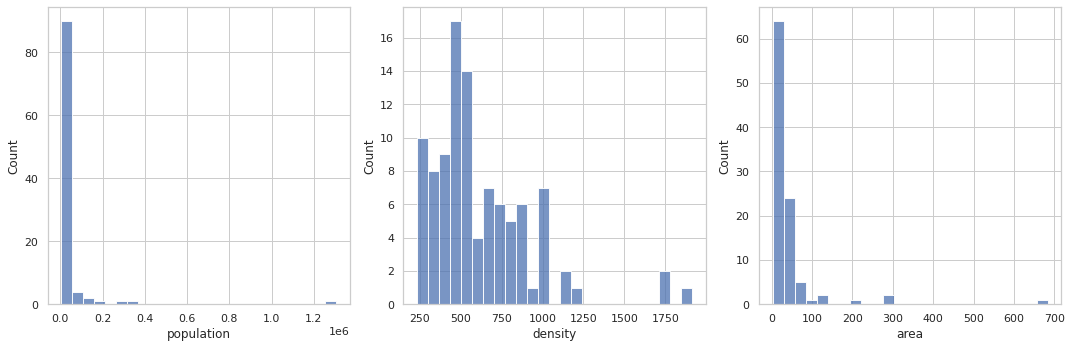

In [25]:
f, ax = plt.subplots(figsize=(15, 5),ncols=3)
sns.histplot(data=df['population'],bins=25, ax=ax[0])
sns.histplot(data=df['density'],bins=25,ax=ax[1])
sns.histplot(data=df['area'],bins=25,ax=ax[2])
plt.tight_layout()
plt.show()

 * The distribution of values in the density column is better when compared to population and area.
 * Most of the cities' population are close to zero when compared with densely populated city Helsinki
 * There is huge difference in population between the less populated and densly populated cities.

### Most populous city

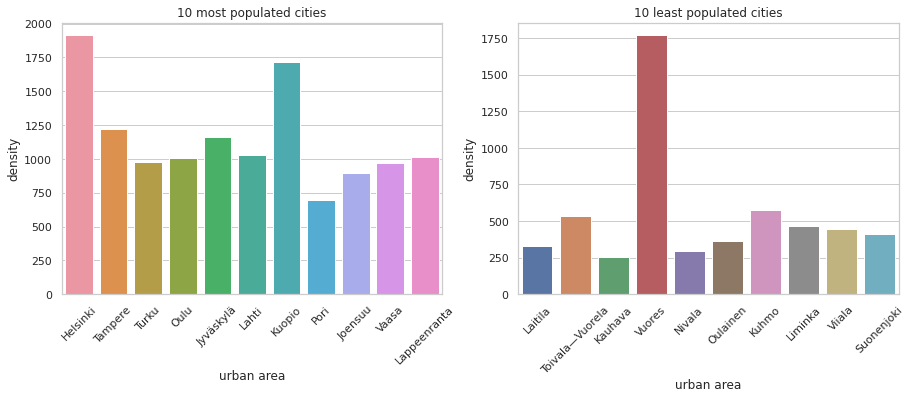

In [26]:
f, ax = plt.subplots(figsize=(15, 5),ncols=2)
sns.barplot(x='urban area',y='density',data=df[:11],ax=ax[0],dodge=False)
ax[0].set_xticklabels(df['urban area'][:11],rotation=45)
ax[0].set_title('10 most populated cities')

sns.barplot(x='urban area',y='density',data=df[90:],ax=ax[1],dodge=True)
ax[1].set_xticklabels(df['urban area'][90:],rotation=45)
ax[1].set_title('10 least populated cities')
plt.show()

* 3/4th of the population dwells in Helsinki, while Suonenjoki has the least population in Finland
* Helsinki and Vuores has the same density( pop per sq km) while the square area of vuores (94th rank) is approximately 200 times smaller than Helsinki (1st rank)

In [27]:
df.loc[df['urban area']=='Helsinki']

,rank,urban area,population,area,density
0,1,Helsinki,1305893.0,682.91,1912.2


In [28]:
df.loc[df['urban area']=='Vuores']

,rank,urban area,population,area,density
93,94,Vuores,5355.0,3.03,1767.3


### Area (km^2)

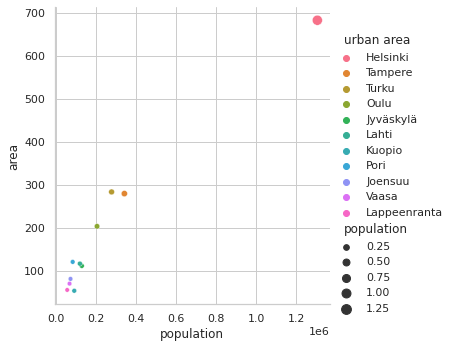

In [29]:
sns.relplot(data = df[:11], x='population',y='area',hue='urban area',size= 'population',sizes=(20,100))
plt.show()


* The above plot shows the top 10 urban areas in relation with population and square area of the city

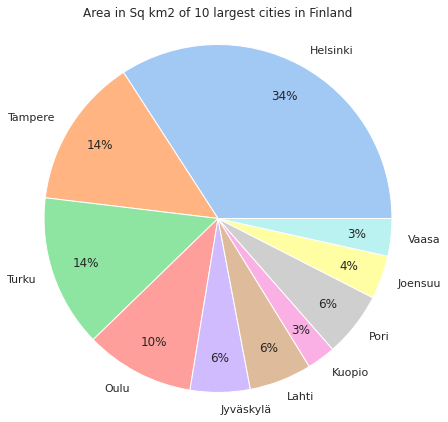

In [30]:
data = df['area'][:10]
labels = df['urban area'][:10]
colors = sns.color_palette('pastel')[0:10]

plt.title('Area in Sq km2 of 10 largest cities in Finland',loc='center',y=1.4)
plt.pie(data, labels = labels, colors = colors,radius=2,autopct='%.0f%%',pctdistance=0.8)
plt.show()

* Helsinki is the largest city in Finland, followed by Turku,Tampere and Oulu

### correlation matrix

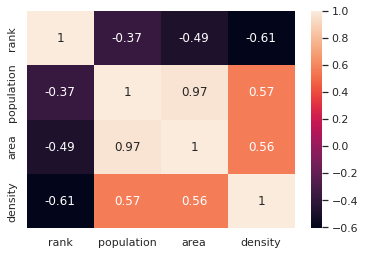

In [31]:
sns.heatmap(df.corr(),annot=True)
plt.show()

* There is high correlation between area and population and moderate correlation between density of population per square km and square area of the city.

## Conclusion

* The Highly populated cities are those with larger square area of the city. 
* Density( pop per sq km) gives a better idea of population than the total population in the city. 
* While there is huge variation in population between cities, the variation in density (pop per sq km) is evenly distributed. 
* Vuores and Helsinki have more or less the same density of population. Vuores has only area span of 3 km2 while Helsinki has a span of 682 km2.
* Larger the area of the city, greater the population, since there is high correlation between these two variables